In [2]:
#import required packages and libraries
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from scipy.stats import pointbiserialr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

#load the dataset onto the notebook 
df = pd.read_csv('medical_clean.csv', index_col=0)

#check datafrme
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job                 10000 non-null  object 
 13  Children            10000 non-null  int64  
 14  Age                 10000 non-null  int64  
 15  Income              10000 non-null  float64
 16  Marital  

In [3]:
#drop columns that are not related to the research question
df = df.drop(columns=['Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Children', 'Income', 'Marital', 'VitD_levels', 'Soft_drink', 'HighBlood', 'Overweight', 'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis', 'Reflux_esophagitis', 'Asthma', 'TotalCharge', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8'])

#visually inspect df to facilitate exploration, spot problems
pd.set_option('display.max_columns', None)
df

,Age,Gender,ReAdmis,Doc_visits,Full_meals_eaten,vitD_supp,Initial_admin,Stroke,Complication_risk,Arthritis,Diabetes,Services,Initial_days,Additional_charges
CaseOrder,,,,,,,,,,,,,,
1,53,Male,No,6,0,0,Emergency Admission,No,Medium,Yes,Yes,Blood Work,10.585770,17939.403420
2,51,Female,No,4,2,1,Emergency Admission,No,High,No,No,Intravenous,15.129562,17612.998120
3,53,Female,No,4,1,0,Elective Admission,No,Medium,No,Yes,Blood Work,4.772177,17505.192460
4,78,Male,No,4,1,0,Elective Admission,Yes,Medium,Yes,No,Blood Work,1.714879,12993.437350
5,22,Female,No,5,0,2,Elective Admission,No,Low,No,No,CT Scan,1.254807,3716.525786
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,25,Male,No,4,2,1,Emergency Admission,No,Medium,No,No,Intravenous,51.561220,8927.642000
9997,87,Male,Yes,5,0,0,Elective Admission,No,Medium,Yes,Yes,CT Scan,68.668240,28507.150000
9998,45,Female,Yes,4,2,0,Elective Admission,No,High,No,No,Intravenous,70.154180,15281.210000


In [4]:
#detection of duplicates True is missing value detected
df.duplicated()

CaseOrder
1        False
2        False
3        False
4        False
5        False
         ...  
9996     False
9997     False
9998     False
9999     False
10000    False
Length: 10000, dtype: bool

In [5]:
#count True and False together
print(df.duplicated().value_counts())


False    10000
Name: count, dtype: int64


In [6]:
#detect missing values
df.isnull().sum()

Age                   0
Gender                0
ReAdmis               0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Initial_admin         0
Stroke                0
Complication_risk     0
Arthritis             0
Diabetes              0
Services              0
Initial_days          0
Additional_charges    0
dtype: int64

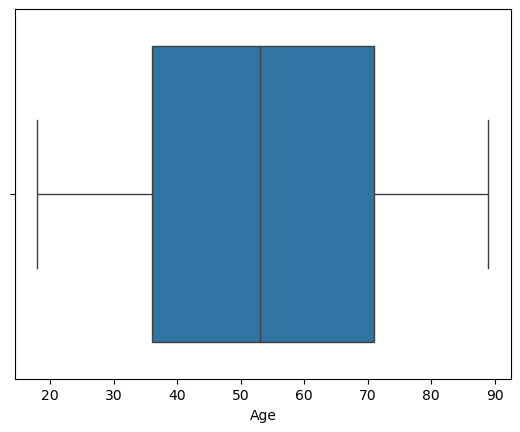

In [7]:
#check outliers for Age
sns.boxplot(x=df['Age'])
#display the plot
plt.show()

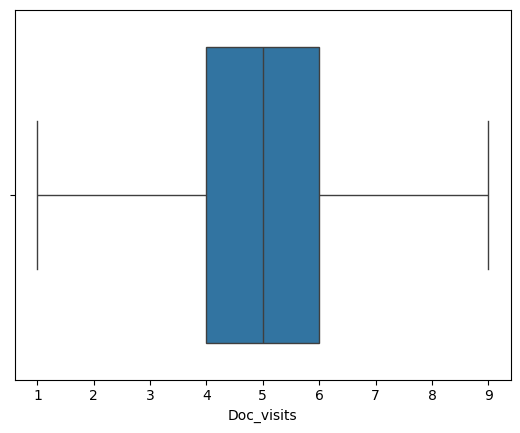

In [8]:
#create a boxplot for Doc_visits
sns.boxplot(x=df['Doc_visits'])
#display the plot
plt.show()

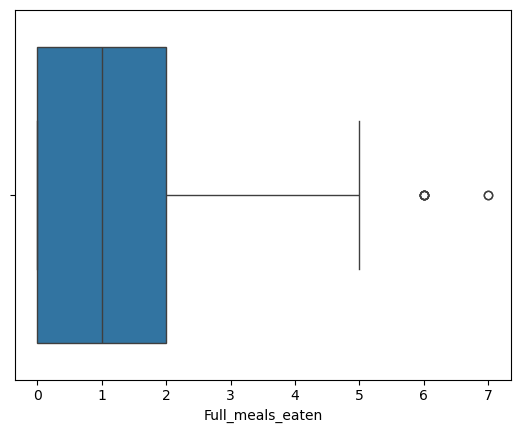

In [9]:
#check the outliers for Full_meals_eaten
sns.boxplot(x=df['Full_meals_eaten'])
#display the plot
plt.show()

In [10]:
#check the outliers using z-scores in Full_meals_eaten
df['Z_Score_Full_meals_eaten'] = stats.zscore(df['Full_meals_eaten'])
df[['Full_meals_eaten','Z_Score_Full_meals_eaten']].head()
df_outliers = df.query('(Z_Score_Full_meals_eaten > 3) | (Z_Score_Full_meals_eaten < -3)')

#number of outliers in Full_meals_eaten
print("Number of outliers:", df_outliers.shape[0])

#get the range of outliers in Full_meals_eaten
outliers_range = df_outliers['Full_meals_eaten'].min(), df_outliers['Full_meals_eaten'].max()

#Print the range of outliers in Full_meals_eaten
print("Range of outliers for 'Full_meals_eaten':", outliers_range)

Number of outliers: 33
Range of outliers for 'Full_meals_eaten': (5, 7)


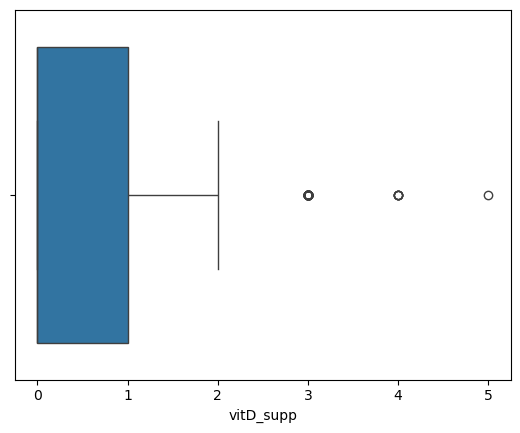

In [11]:
#create a boxplot for vitD_supp
sns.boxplot(x=df['vitD_supp'])
#display the plot
plt.show()

In [12]:
#check the outliers using z-scores in vitD_supp
df['Z_Score_vitD_supp'] = stats.zscore(df['vitD_supp'])
df[['vitD_supp','Z_Score_vitD_supp']].head()
df_outliers = df.query('(Z_Score_vitD_supp > 3) | (Z_Score_vitD_supp < -3)')
#number of outliers in vitD_supp
print("Number of outliers:", df_outliers.shape[0])
#get the range of outliers in vitD_supp
outliers_range = df_outliers['vitD_supp'].min(), df_outliers['vitD_supp'].max()
#Print the range of outliers in vitD_supp
print("Range of outliers for 'vitD_supp':", outliers_range)

Number of outliers: 70
Range of outliers for 'vitD_supp': (3, 5)


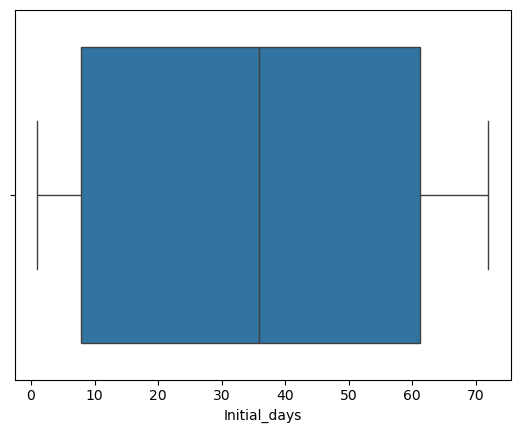

In [13]:
#create a boxplot for Initial_days
sns.boxplot(x=df['Initial_days'])
#display the plot
plt.show()

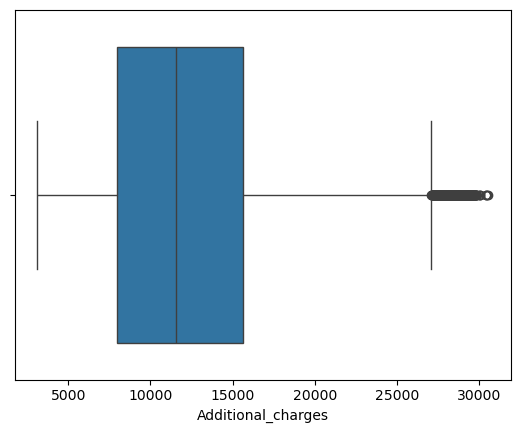

In [14]:
#create a boxplot for Additional_charges
sns.boxplot(x=df['Additional_charges'])
#display the plot
plt.show()

In [15]:
#check the outliers using z-scores in Additional_charges
df['Z_Score_Additional_charges'] = stats.zscore(df['Additional_charges'])
df[['Additional_charges','Z_Score_Additional_charges']].head()
df_outliers = df.query('(Z_Score_Additional_charges > 3) | (Z_Score_Additional_charges < -3)')
#number of outliers in Additional_charges
print("Number of outliers:", df_outliers.shape[0])
#get the range of outliers in Additional_charges
outliers_range = df_outliers['Additional_charges'].min(), df_outliers['Additional_charges'].max()
#print the range of outliers in Additional_charges
print("Range of outliers for 'Additional_charges':", outliers_range)

Number of outliers: 0
Range of outliers for 'Additional_charges': (nan, nan)


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         10000 non-null  int64  
 1   Gender                      10000 non-null  object 
 2   ReAdmis                     10000 non-null  object 
 3   Doc_visits                  10000 non-null  int64  
 4   Full_meals_eaten            10000 non-null  int64  
 5   vitD_supp                   10000 non-null  int64  
 6   Initial_admin               10000 non-null  object 
 7   Stroke                      10000 non-null  object 
 8   Complication_risk           10000 non-null  object 
 9   Arthritis                   10000 non-null  object 
 10  Diabetes                    10000 non-null  object 
 11  Services                    10000 non-null  object 
 12  Initial_days                10000 non-null  float64
 13  Additional_charges          10000 no

In [18]:
#drop Z_Score_Additional_charges, Z_Score_Full_meals_eaten, Z_Score_vitD_supp
df = df.drop(columns=['Z_Score_Additional_charges', 'Z_Score_Full_meals_eaten', 'Z_Score_vitD_supp'])

In [65]:
#get summary statistics for quantitative variables 
df.describe()

,Age,Doc_visits,Full_meals_eaten,vitD_supp,Initial_days,Additional_charges
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,5.012200,1.001400,0.398900,34.455299,12934.528587
std,20.638538,1.045734,1.008117,0.628505,26.309341,6542.601544
min,18.000000,1.000000,0.000000,0.000000,1.001981,3125.703000
25%,36.000000,4.000000,0.000000,0.000000,7.896215,7986.487755
50%,53.000000,5.000000,1.000000,0.000000,35.836244,11573.977735
75%,71.000000,6.000000,2.000000,1.000000,61.161020,15626.490000
max,89.000000,9.000000,7.000000,5.000000,71.981490,30566.070000


In [66]:
#summary for categorical Gender
df.Gender.value_counts()

Gender
Female       5018
Male         4768
Nonbinary     214
Name: count, dtype: int64

In [67]:
#summary for categorica ReAdmis
df.ReAdmis.value_counts()

ReAdmis
No     6331
Yes    3669
Name: count, dtype: int64

In [68]:
#summary for categorical Initial_admin
df.Initial_admin.value_counts()

Initial_admin
Emergency Admission      5060
Elective Admission       2504
Observation Admission    2436
Name: count, dtype: int64

In [69]:
#summary for categorical Stroke
df.Stroke.value_counts()

Stroke
No     8007
Yes    1993
Name: count, dtype: int64

In [21]:
#summary for categorical Complication_risk
df.Complication_risk.value_counts()

Complication_risk
Medium    4517
High      3358
Low       2125
Name: count, dtype: int64

In [22]:
#summary for categorical Arthritis
df.Arthritis.value_counts()

Arthritis
No     6426
Yes    3574
Name: count, dtype: int64

In [23]:
#summary for categorical Diabetes
df.Diabetes.value_counts()

Diabetes
No     7262
Yes    2738
Name: count, dtype: int64

In [24]:
#summary for Services
df.Services.value_counts()

Services
Blood Work     5265
Intravenous    3130
CT Scan        1225
MRI             380
Name: count, dtype: int64

In [29]:
#convert ReAdmis, Stroke, Arthritis, Diabetes from string to boolean
bool_mapping = {"Yes" : 1, "No" : 0}

df["ReAdmis"] = df["ReAdmis"].map(bool_mapping)

df["Stroke"] = df["Stroke"].map(bool_mapping)

df["Arthritis"] = df["Arthritis"].map(bool_mapping)

df["Diabetes"] = df["Diabetes"].map(bool_mapping)

#convert Gender, Initial_admin, Complication_risk, Services to category from string
df["Gender"] = df["Gender"].astype("category")

df["Initial_admin"] = df["Initial_admin"].astype("category")

df["Complication_risk"] = df["Complication_risk"].astype("category")

df["Services"] = df["Services"].astype("category")


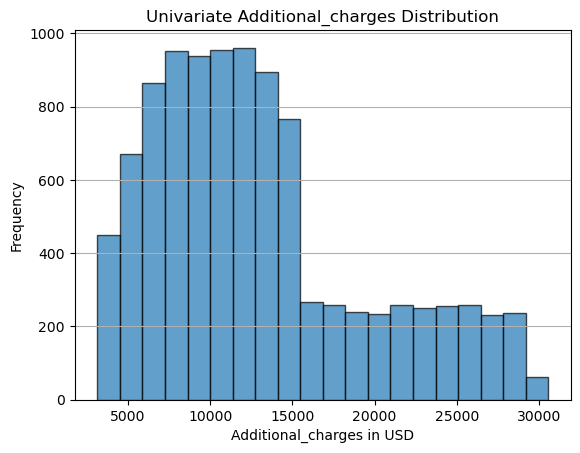

In [30]:
#Create a histogram of Additional_charges distribution
plt.hist(data=df, x='Additional_charges', bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Additional_charges in USD')
plt.ylabel('Frequency')
plt.title('Univariate Additional_charges Distribution')
plt.grid(axis='y')
plt.show()

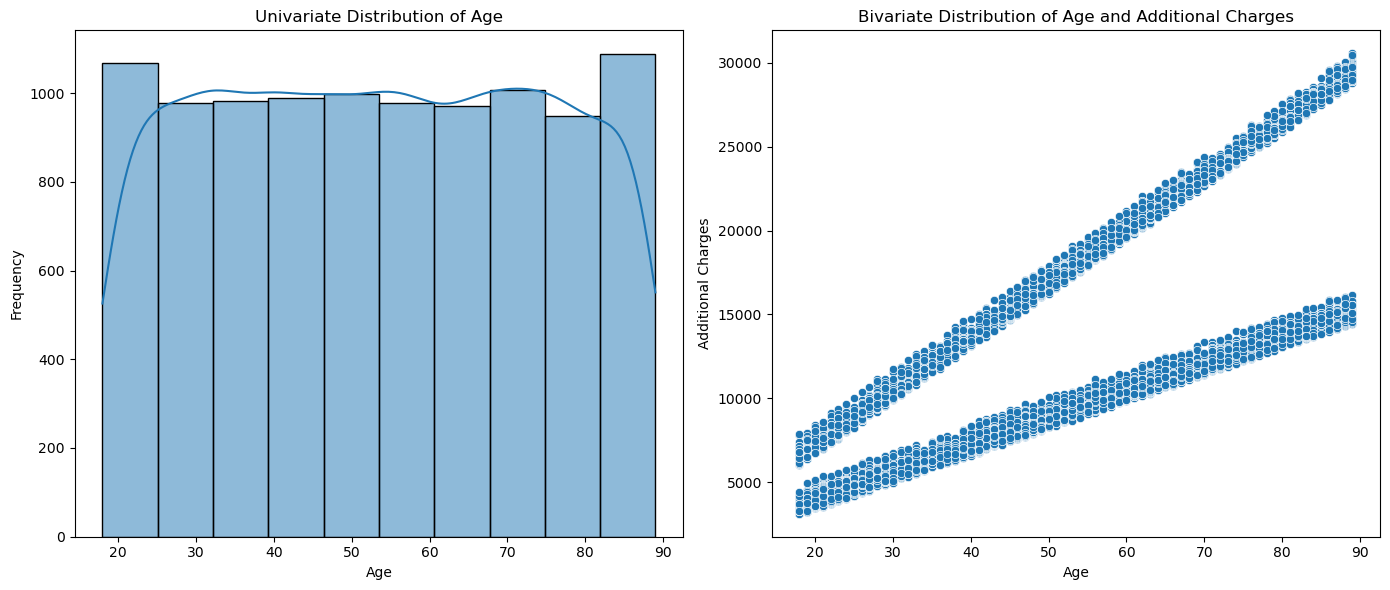

Correlation between Age and Additional Charges: 0.7168536181504477


In [31]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT plot: Univariate distribution of Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Univariate Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

#RIGHT plot: Bivariate distribution of Age and Additional Charges (Scatter plot)
plt.subplot(1, 2, 2)
sns.scatterplot(x='Age', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of Age and Additional Charges')
plt.xlabel('Age')
plt.ylabel('Additional Charges')

#show the plots
plt.tight_layout()
plt.show()

#get correlation between Age and Additional_charges
correlation = df['Age'].corr(df['Additional_charges'])
print(f'Correlation between Age and Additional Charges: {correlation}')

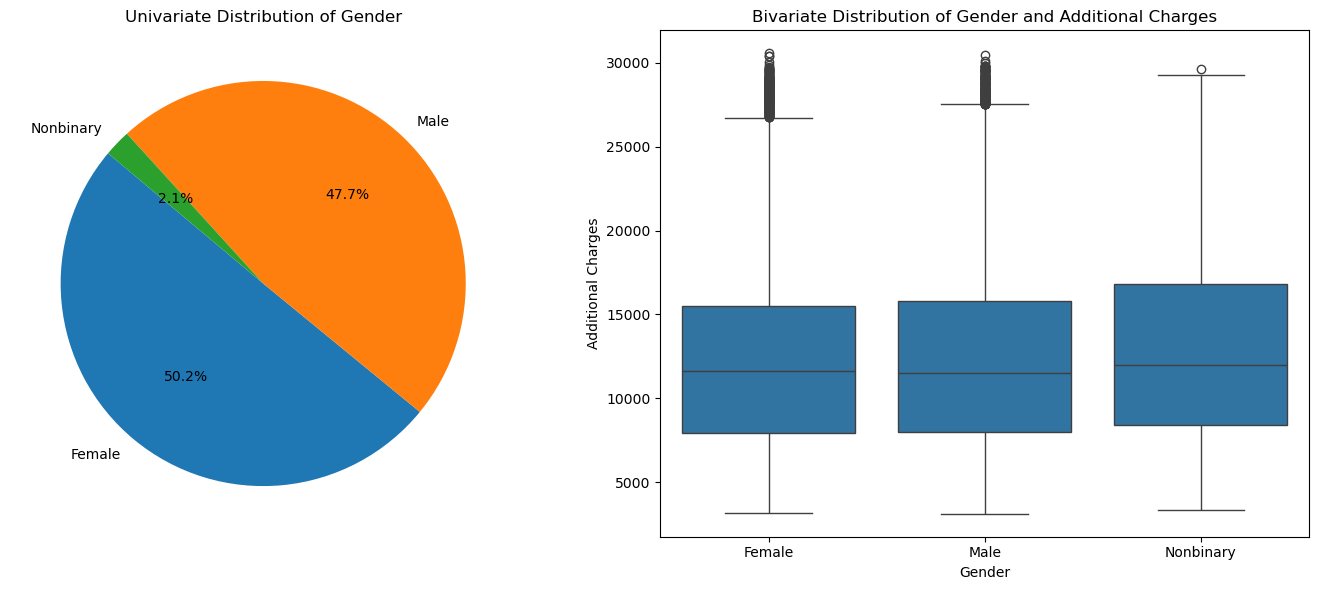

ANOVA result: F-statistic = 0.6845120869965233, p-value = 0.5043598782727055


In [32]:
# Create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

# LEFT plot: Univariate distribution of Gender using a pie chart
plt.subplot(1, 2, 1)
gender_counts = df['Gender'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Univariate Distribution of Gender')

# RIGHT plot: Bivariate distribution of Gender and Additional Charges
plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of Gender and Additional Charges')
plt.xlabel('Gender')
plt.ylabel('Additional Charges')

# Show the plots
plt.tight_layout()
plt.show()

#perform ANOVA
anova_result = f_oneway(df[df['Gender'] == 'Male']['Additional_charges'],
                        df[df['Gender'] == 'Female']['Additional_charges'],
                        df[df['Gender'] == 'Nonbinary']['Additional_charges'])

print(f'ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')


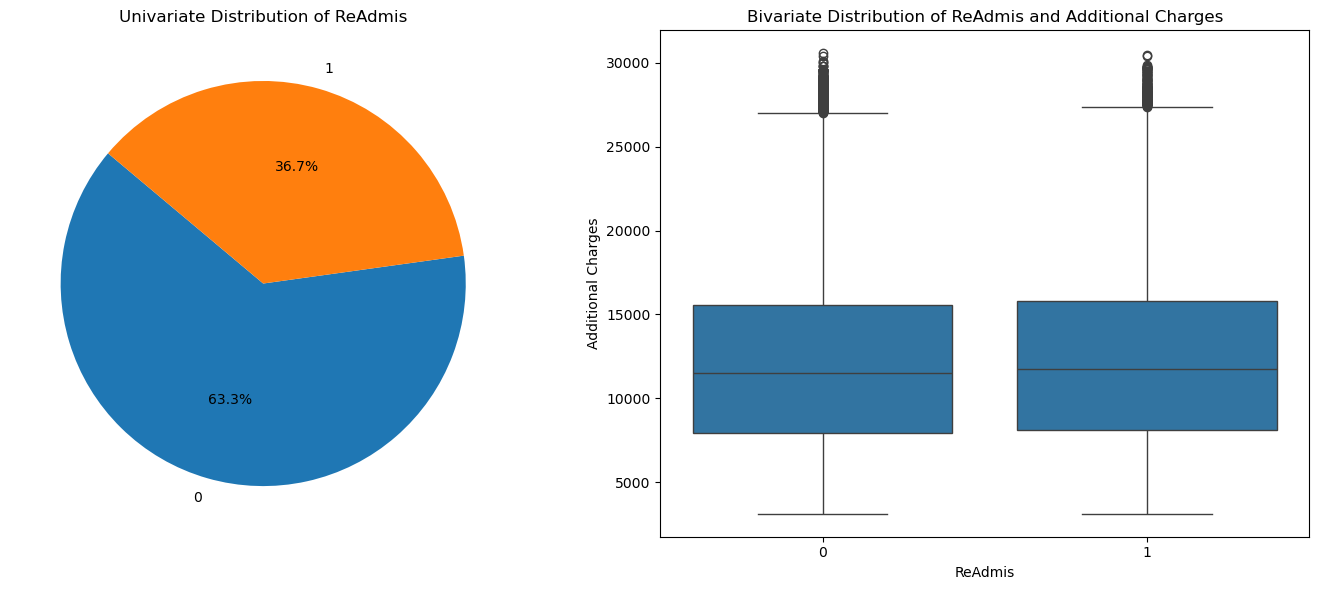

Correlation between ReAdmis and Additional Charges: 0.013619831292723407
P-value: 0.17323701125537996


In [33]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT plot: Univariate distribution of ReAdmis using a pie chart
plt.subplot(1, 2, 1)
readmis_counts = df['ReAdmis'].value_counts()
plt.pie(readmis_counts, labels=readmis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Univariate Distribution of ReAdmis')

#RIGHT plot: Bivariate distribution of ReAdmis and Additional Charges
plt.subplot(1, 2, 2)
sns.boxplot(x='ReAdmis', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of ReAdmis and Additional Charges')
plt.xlabel('ReAdmis')
plt.ylabel('Additional Charges')

#show the plots
plt.tight_layout()
plt.show()

#calculate the point biserial correlation
correlation, p_value = pointbiserialr(df['ReAdmis'], df['Additional_charges'])
print(f'Correlation between ReAdmis and Additional Charges: {correlation}')
print(f'P-value: {p_value}')


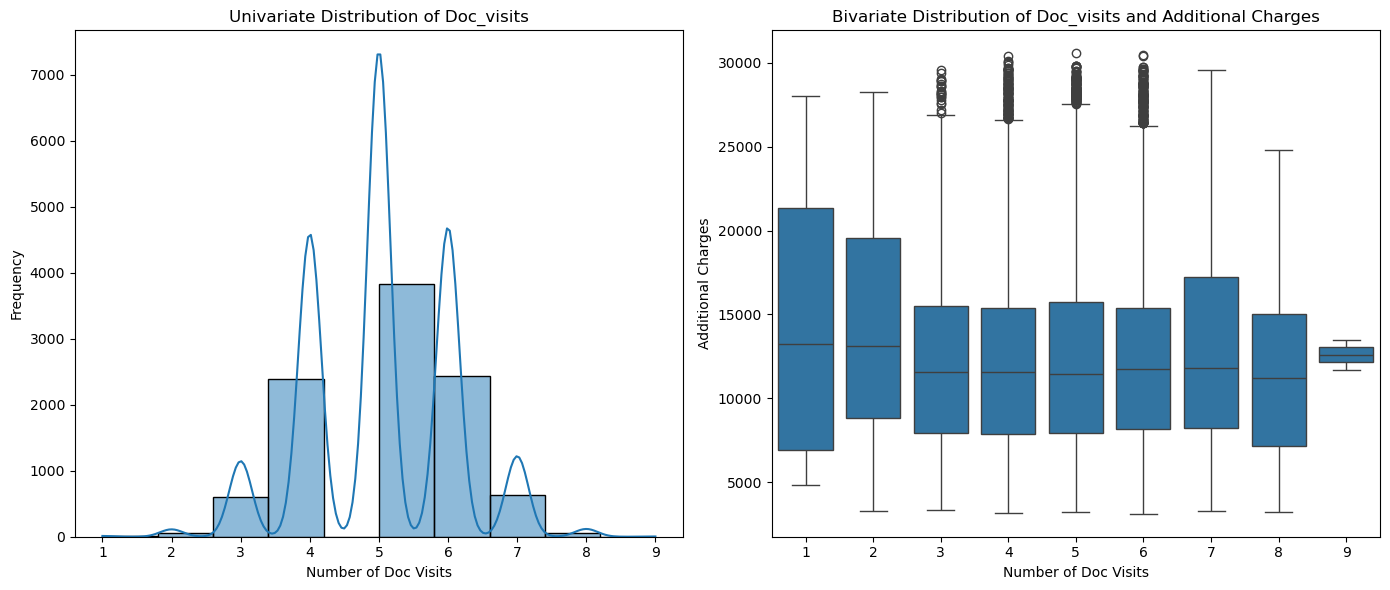

Correlation between Doc_visits and Additional Charges: 0.008071607987477417


In [34]:
# Create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

# LEFT plot: Univariate distribution of Doc_visits
plt.subplot(1, 2, 1)
sns.histplot(df['Doc_visits'], bins=10, kde=True)
plt.title('Univariate Distribution of Doc_visits')
plt.xlabel('Number of Doc Visits')
plt.ylabel('Frequency')

# RIGHT plot: Bivariate distribution of Doc_visits and Additional Charges
plt.subplot(1, 2, 2)
sns.boxplot(x='Doc_visits', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of Doc_visits and Additional Charges')
plt.xlabel('Number of Doc Visits')
plt.ylabel('Additional Charges')

# Show the plots
plt.tight_layout()
plt.show()

#get correlation between Doc_visits and Additional_charges
correlation = df['Doc_visits'].corr(df['Additional_charges'])
print(f'Correlation between Doc_visits and Additional Charges: {correlation}')


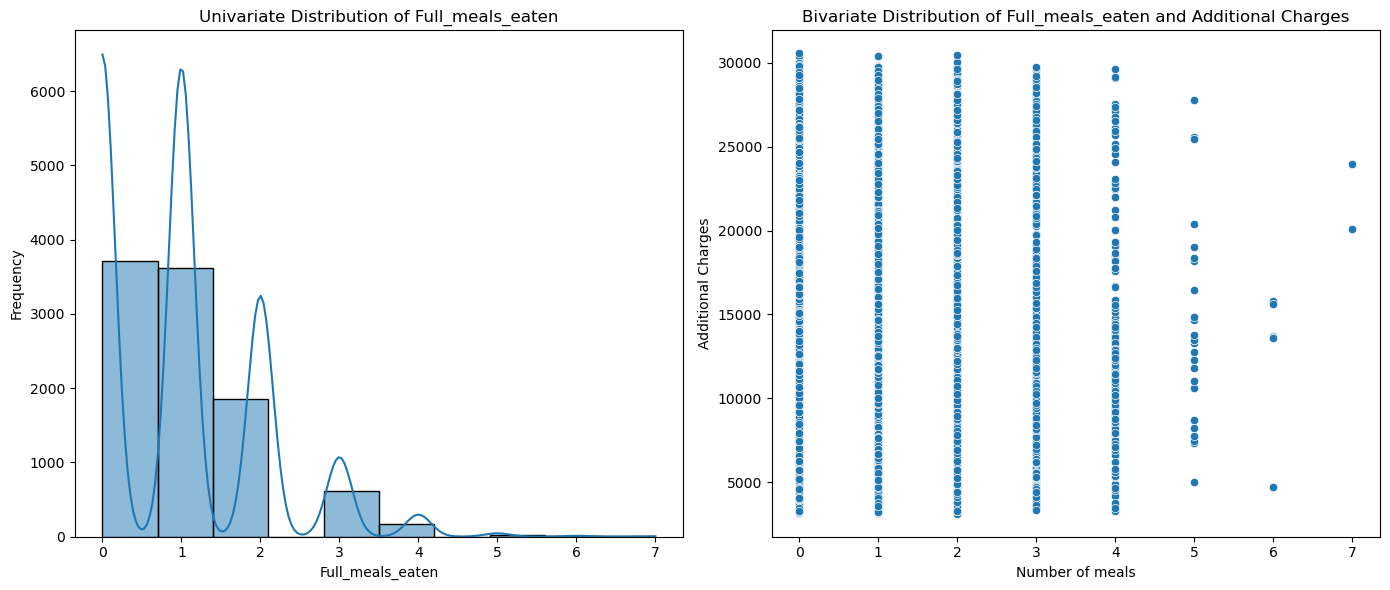

Correlation between Full_meals_eaten and Additional Charges: 0.018763142843426495


In [35]:
# Create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

# LEFT plot: Univariate distribution of Full_meals_eaten
plt.subplot(1, 2, 1)
sns.histplot(df['Full_meals_eaten'], bins=10, kde=True)
plt.title('Univariate Distribution of Full_meals_eaten')
plt.xlabel('Full_meals_eaten')
plt.ylabel('Frequency')

# RIGHT plot: Bivariate distribution of Full_meals_eaten and Additional Charges
plt.subplot(1, 2, 2)
sns.scatterplot(x='Full_meals_eaten', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of Full_meals_eaten and Additional Charges')
plt.xlabel('Number of meals')
plt.ylabel('Additional Charges')

# Show the plots
plt.tight_layout()
plt.show()

#get correlation between Full_meals_eaten and Additional_charges
correlation = df['Full_meals_eaten'].corr(df['Additional_charges'])
print(f'Correlation between Full_meals_eaten and Additional Charges: {correlation}')


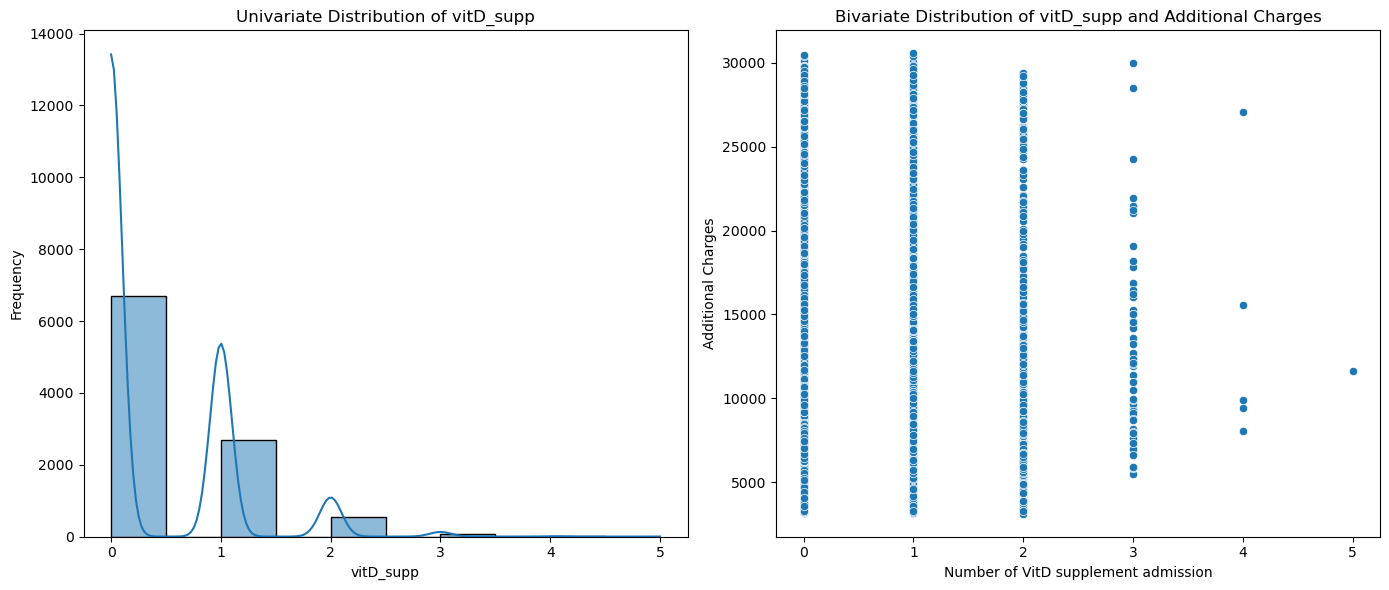

Correlation between vitD_supp and Additional Charges: 0.010327339590499782


In [36]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT plot: Univariate distribution of vitD_supp
plt.subplot(1, 2, 1)
sns.histplot(df['vitD_supp'], bins=10, kde=True)
plt.title('Univariate Distribution of vitD_supp')
plt.xlabel('vitD_supp')
plt.ylabel('Frequency')

#RIGHT plot: Bivariate distribution of Full_meals_eaten and Additional Charges
plt.subplot(1, 2, 2)
sns.scatterplot(x='vitD_supp', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of vitD_supp and Additional Charges')
plt.xlabel('Number of VitD supplement admission')
plt.ylabel('Additional Charges')

#show the plots
plt.tight_layout()
plt.show()

#get correlation between vitD_supp and Additional_charges
correlation = df['vitD_supp'].corr(df['Additional_charges'])
print(f'Correlation between vitD_supp and Additional Charges: {correlation}')


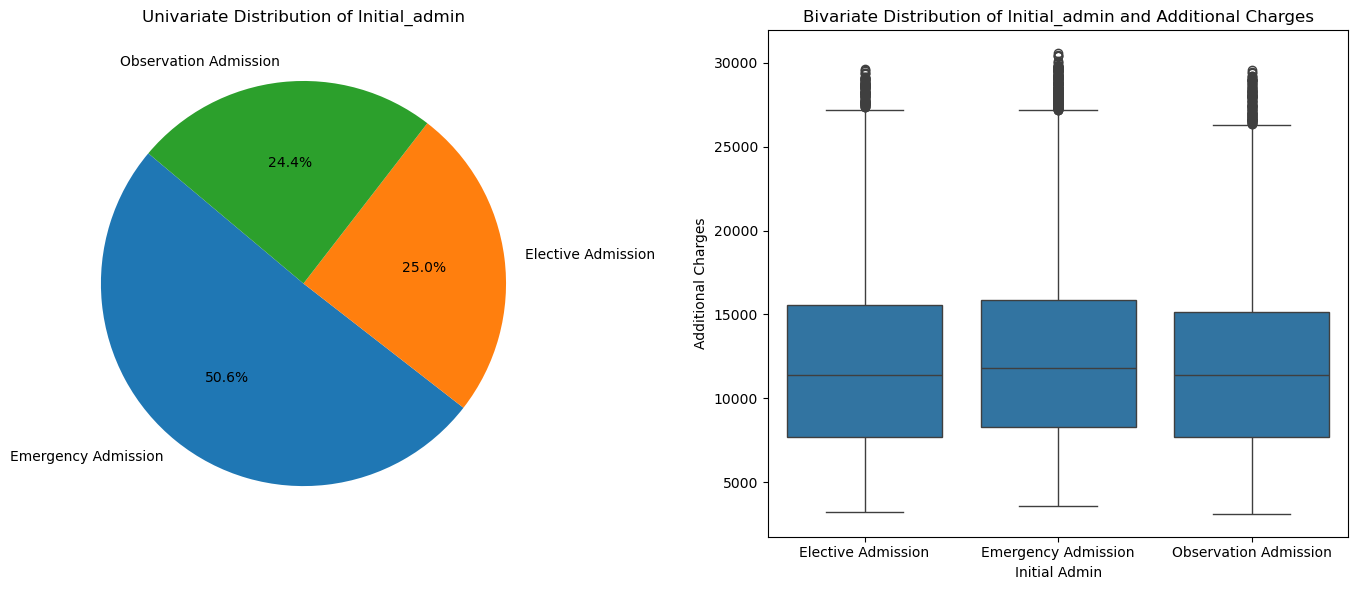

ANOVA result: F-statistic = 6.6895186824647865, p-value = 0.0012494568234688924


In [37]:
#Create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT plot: Univariate distribution of Initial_admin using a pie chart
plt.subplot(1, 2, 1)
initial_admin_counts = df['Initial_admin'].value_counts()
plt.pie(initial_admin_counts, labels=initial_admin_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Univariate Distribution of Initial_admin')

#RIGHT plot: Bivariate distribution of Initial_admin and Additional Charges
plt.subplot(1, 2, 2)
sns.boxplot(x='Initial_admin', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of Initial_admin and Additional Charges')
plt.xlabel('Initial Admin')
plt.ylabel('Additional Charges')

#show the plots
plt.tight_layout()
plt.show()

#perform ANOVA
anova_result = f_oneway(df[df['Initial_admin'] == 'Emergency Admission']['Additional_charges'],
                        df[df['Initial_admin'] == 'Elective Admission']['Additional_charges'],
                        df[df['Initial_admin'] == 'Observation Admission']['Additional_charges'])

print(f'ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')


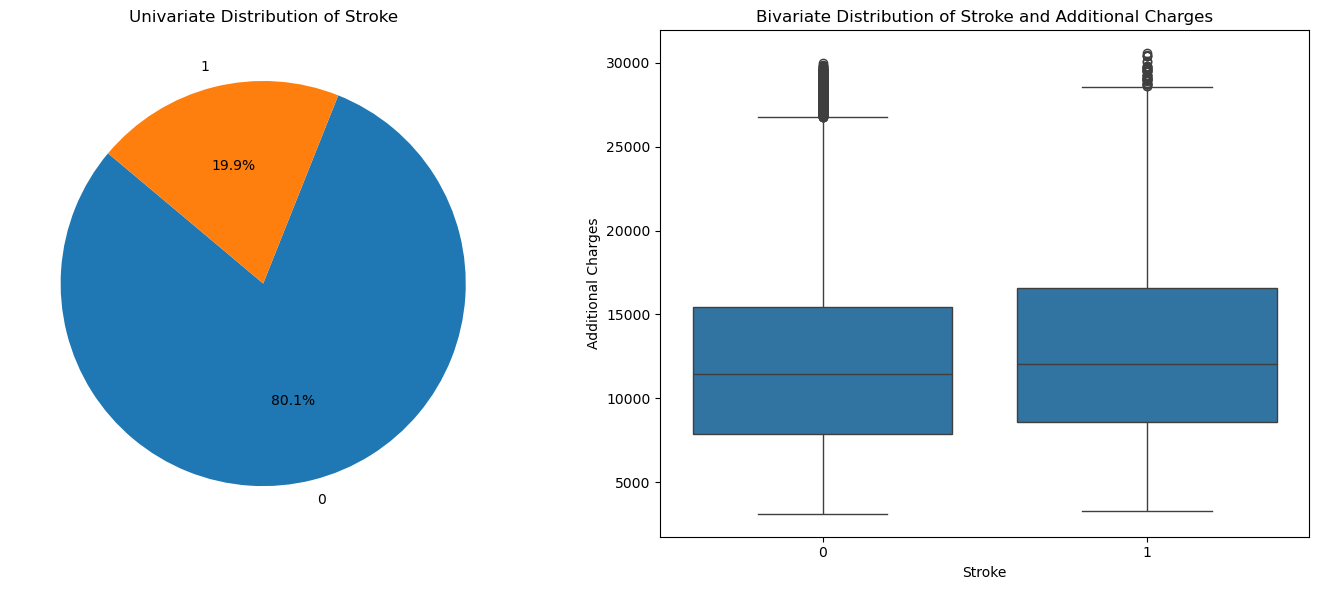

Correlation between Stroke and Additional Charges: 0.035139694729822056
P-value: 0.000440391014104272


In [38]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT plot: Univariate distribution of Stroke using a pie chart
plt.subplot(1, 2, 1)
stroke_counts = df['Stroke'].value_counts()
plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Univariate Distribution of Stroke')

#RIGHT plot: Bivariate distribution of Arthritis and Additional Charges
plt.subplot(1, 2, 2)
sns.boxplot(x='Stroke', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of Stroke and Additional Charges')
plt.xlabel('Stroke')
plt.ylabel('Additional Charges')

#show the plots
plt.tight_layout()
plt.show()

#calculate the point biserial correlation
correlation, p_value = pointbiserialr(df['Stroke'], df['Additional_charges'])
print(f'Correlation between Stroke and Additional Charges: {correlation}')
print(f'P-value: {p_value}')


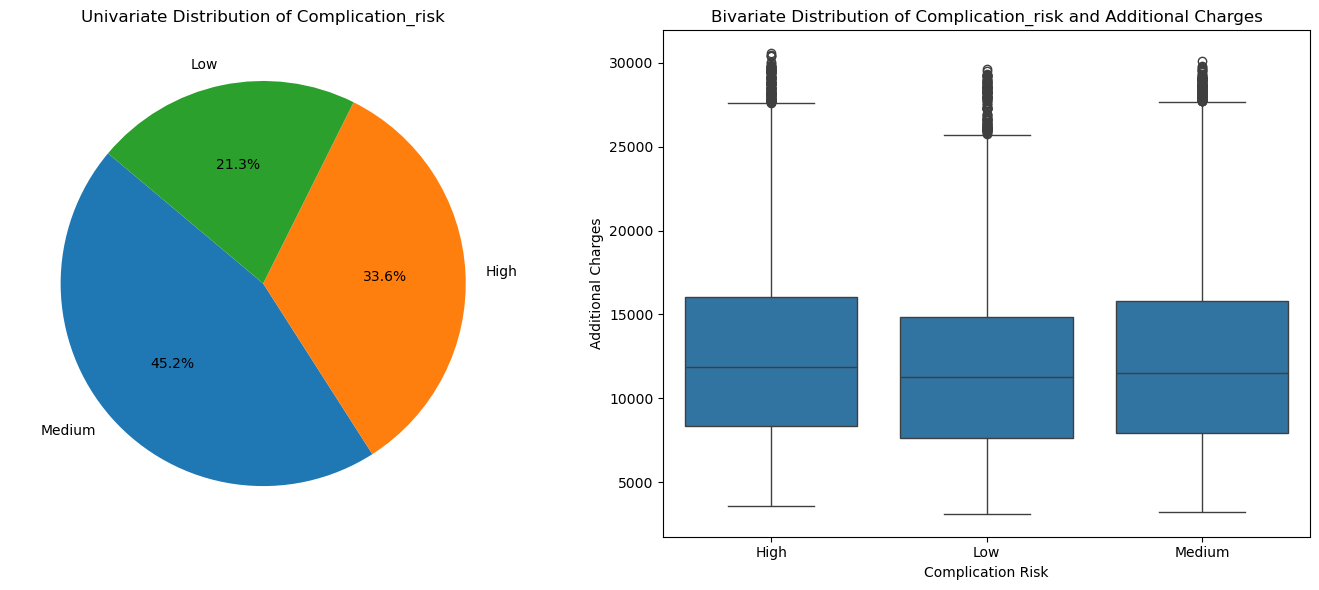

ANOVA result: F-statistic = 10.582891424194006, p-value = 2.563110020542361e-05


In [39]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT plot: Univariate distribution of Complication_risk using a pie chart
plt.subplot(1, 2, 1)
complication_risk_counts = df['Complication_risk'].value_counts()
plt.pie(complication_risk_counts, labels=complication_risk_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Univariate Distribution of Complication_risk')

#RIGHT plot: Bivariate distribution of Complication_risk and Additional Charges
plt.subplot(1, 2, 2)
sns.boxplot(x='Complication_risk', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of Complication_risk and Additional Charges')
plt.xlabel('Complication Risk')
plt.ylabel('Additional Charges')

#show the plots
plt.tight_layout()
plt.show()

#perform ANOVA
anova_result = f_oneway(df[df['Complication_risk'] == 'Medium']['Additional_charges'],
                        df[df['Complication_risk'] == 'High']['Additional_charges'],
                        df[df['Complication_risk'] == 'Low']['Additional_charges'])

print(f'ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')


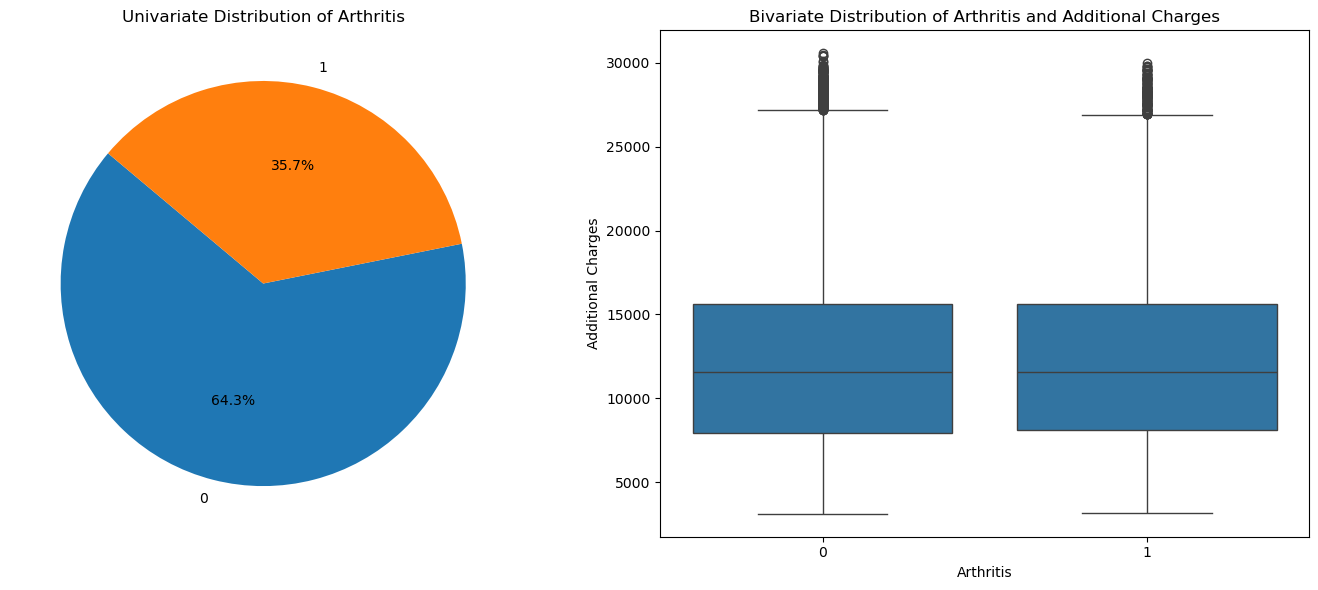

Correlation between Arthritis and Additional Charges: 0.004787653895039417
P-value: 0.6321461719588812


In [40]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT plot: Univariate distribution of Arthritis using a pie chart
plt.subplot(1, 2, 1)
arthritis_counts = df['Arthritis'].value_counts()
plt.pie(arthritis_counts, labels=arthritis_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Univariate Distribution of Arthritis')

#RIGHT plot: Bivariate distribution of Arthritis and Additional Charges
plt.subplot(1, 2, 2)
sns.boxplot(x='Arthritis', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of Arthritis and Additional Charges')
plt.xlabel('Arthritis')
plt.ylabel('Additional Charges')

#show the plots
plt.tight_layout()
plt.show()

#calculate the point biserial correlation
correlation, p_value = pointbiserialr(df['Arthritis'], df['Additional_charges'])
print(f'Correlation between Arthritis and Additional Charges: {correlation}')
print(f'P-value: {p_value}')


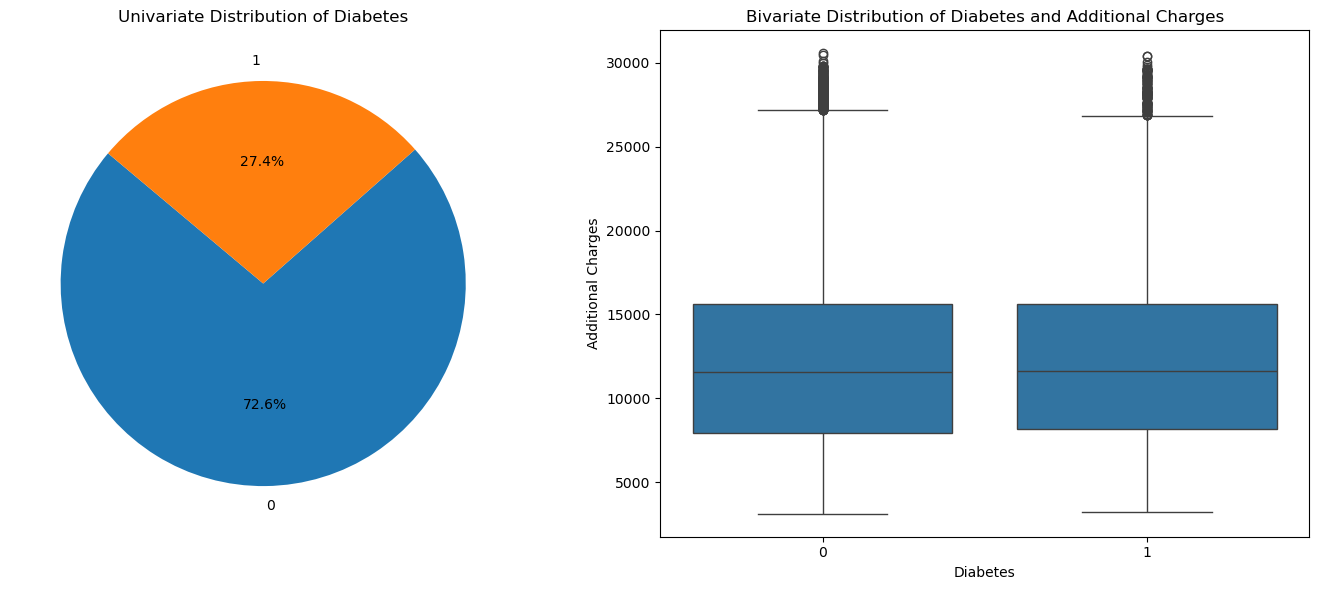

Correlation between Diabetes and Additional Charges: 0.00244967548984006
P-value: 0.8065049847983158


In [41]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT plot: Univariate distribution of Diabetes using a pie chart
plt.subplot(1, 2, 1)
diabetes_counts = df['Diabetes'].value_counts()
plt.pie(diabetes_counts, labels=diabetes_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Univariate Distribution of Diabetes')

#RIGHT plot: Bivariate distribution of Diabetes and Additional Charges
plt.subplot(1, 2, 2)
sns.boxplot(x='Diabetes', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of Diabetes and Additional Charges')
plt.xlabel('Diabetes')
plt.ylabel('Additional Charges')

#show the plots
plt.tight_layout()
plt.show()

#calculate the point biserial correlation
correlation, p_value = pointbiserialr(df['Diabetes'], df['Additional_charges'])
print(f'Correlation between Diabetes and Additional Charges: {correlation}')
print(f'P-value: {p_value}')


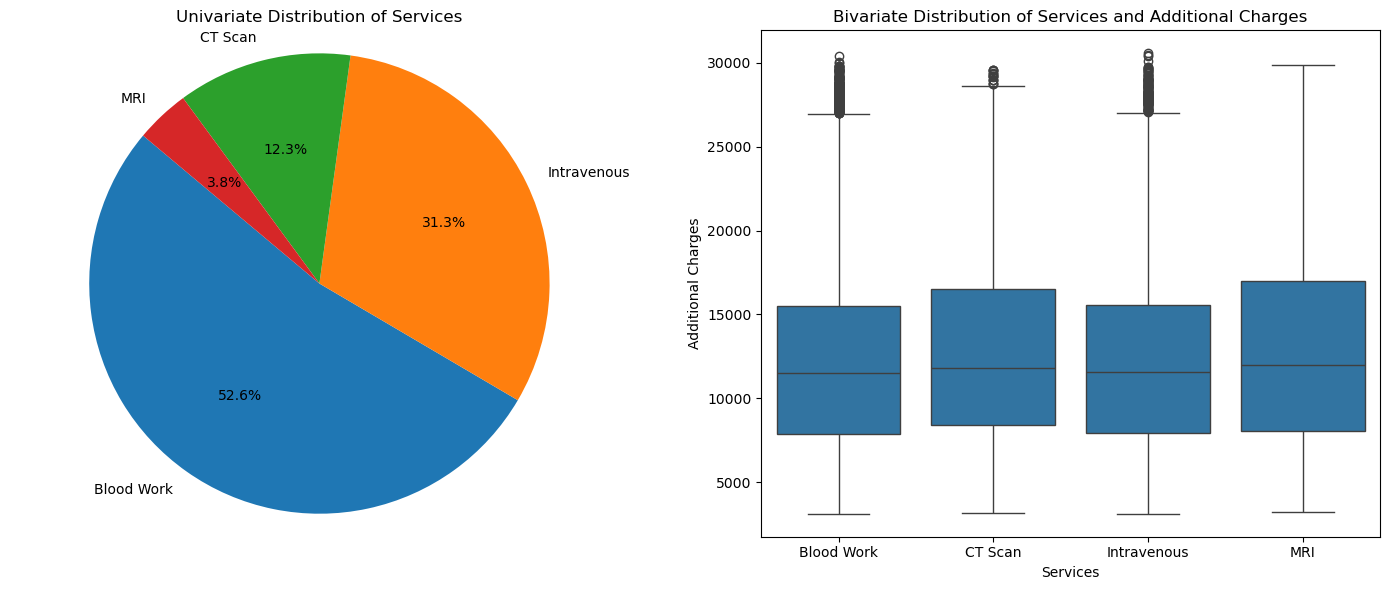

ANOVA result: F-statistic = 1.0451339995046665, p-value = 0.3712656343662567


In [42]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT plot: Pie chart for univariate distribution of Services
plt.subplot(1, 2, 1)
service_counts = df['Services'].value_counts()
plt.pie(service_counts, labels=service_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Univariate Distribution of Services')
plt.axis('equal') 

#RIGHT plot: Bivariate distribution of Services and Additional Charges
plt.subplot(1, 2, 2)
sns.boxplot(x='Services', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of Services and Additional Charges')
plt.xlabel('Services')
plt.ylabel('Additional Charges')

#show the plots
plt.tight_layout()
plt.show()

#perform ANOVA
anova_result = f_oneway(df[df['Services'] == 'Blood Work']['Additional_charges'],
                        df[df['Services'] == 'Intravenous']['Additional_charges'],
                        df[df['Services'] == 'CT Scan']['Additional_charges'],
                        df[df['Services'] == 'MRI']['Additional_charges'])

print(f'ANOVA result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}')


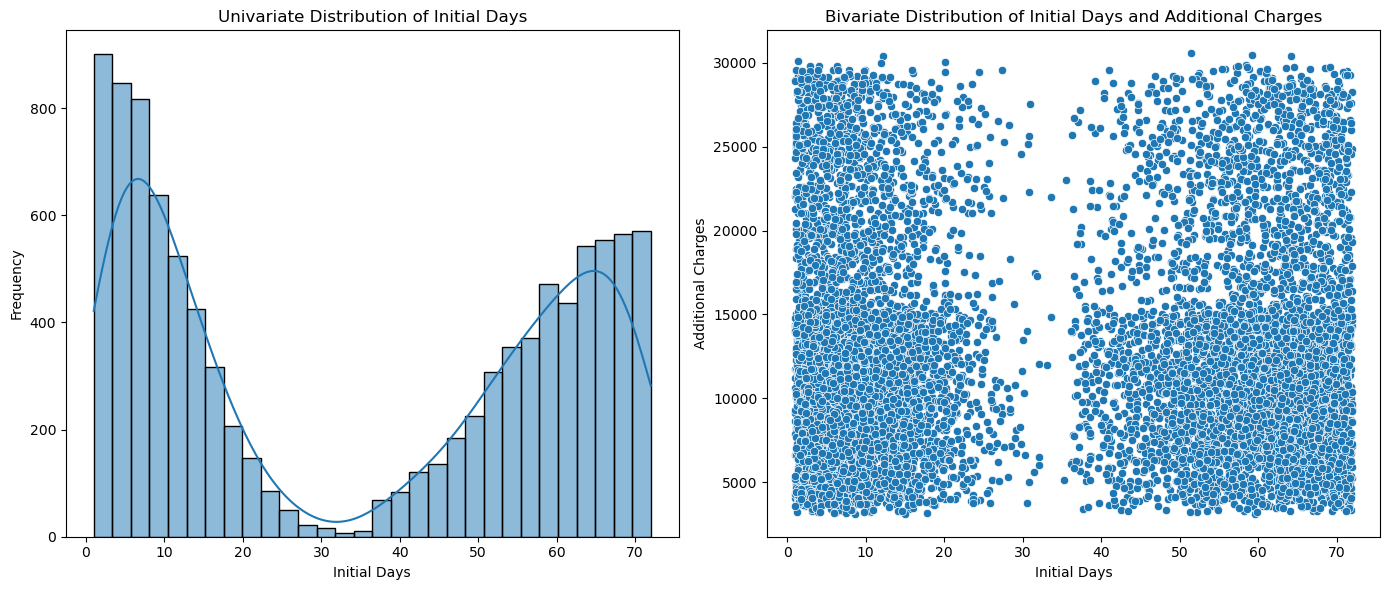

Correlation between Initial_days and Additional Charges: 0.004408882897522523


In [43]:
#create a figure with two subplots side by side
plt.figure(figsize=(14, 6))

#LEFT plot: Histogram for univariate distribution of Initial Days
plt.subplot(1, 2, 1)
sns.histplot(df['Initial_days'], bins=30, kde=True)
plt.title('Univariate Distribution of Initial Days')
plt.xlabel('Initial Days')
plt.ylabel('Frequency')

#RIGHT plot: Scatter plot for bivariate distribution of Initial Days and Additional Charges
plt.subplot(1, 2, 2)
sns.scatterplot(x='Initial_days', y='Additional_charges', data=df)
plt.title('Bivariate Distribution of Initial Days and Additional Charges')
plt.xlabel('Initial Days')
plt.ylabel('Additional Charges')

#show the plots
plt.tight_layout()
plt.show()

#get correlation between Initial_days and Additional_charges
correlation = df['Initial_days'].corr(df['Additional_charges'])
print(f'Correlation between Initial_days and Additional Charges: {correlation}')



In [44]:
#set the pandas option to opt-in to the future behavior
pd.set_option('future.no_silent_downcasting', True)

#One Hot Encoding using get_dummies
df_regress = pd.get_dummies(df, columns=['Gender', 'Initial_admin', 'Complication_risk', 'Services'], drop_first=True)

df_regress = df_regress.replace({True: 1, False: 0})

#convert all columns to numeric
df_regress = df_regress.apply(pd.to_numeric)

df_regress


,Age,ReAdmis,Doc_visits,Full_meals_eaten,vitD_supp,Stroke,Arthritis,Diabetes,Initial_days,Additional_charges,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Complication_risk_Low,Complication_risk_Medium,Services_CT Scan,Services_Intravenous,Services_MRI
CaseOrder,,,,,,,,,,,,,,,,,,,
1,53,0,6,0,0,0,1,1,10.585770,17939.403420,1,0,1,0,0,1,0,0,0
2,51,0,4,2,1,0,0,0,15.129562,17612.998120,0,0,1,0,0,0,0,1,0
3,53,0,4,1,0,0,0,1,4.772177,17505.192460,0,0,0,0,0,1,0,0,0
4,78,0,4,1,0,1,1,0,1.714879,12993.437350,1,0,0,0,0,1,0,0,0
5,22,0,5,0,2,0,0,0,1.254807,3716.525786,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,25,0,4,2,1,0,0,0,51.561220,8927.642000,1,0,1,0,0,1,0,1,0
9997,87,1,5,0,0,0,1,1,68.668240,28507.150000,1,0,0,0,0,1,1,0,0
9998,45,1,4,2,0,0,0,0,70.154180,15281.210000,0,0,0,0,0,0,0,1,0


In [45]:
df_regress.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  10000 non-null  int64  
 1   ReAdmis                              10000 non-null  int64  
 2   Doc_visits                           10000 non-null  int64  
 3   Full_meals_eaten                     10000 non-null  int64  
 4   vitD_supp                            10000 non-null  int64  
 5   Stroke                               10000 non-null  int64  
 6   Arthritis                            10000 non-null  int64  
 7   Diabetes                             10000 non-null  int64  
 8   Initial_days                         10000 non-null  float64
 9   Additional_charges                   10000 non-null  float64
 10  Gender_Male                          10000 non-null  int64  
 11  Gender_Nonbinary                 

In [45]:
#prepared dataset to csv file
df_regress.to_csv('D208_task1.csv', index=False)

In [46]:
#set dependent variable
y = df_regress['Additional_charges']

#set multiple independent variables
X = df_regress[['Age', 'ReAdmis', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'Stroke', 'Arthritis', 'Diabetes', 'Initial_days', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']]

#calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())


Age: 6.55
ReAdmis: 5.67
Doc_visits: 11.03
Full_meals_eaten: 1.95
vitD_supp: 1.39
Stroke: 1.24
Arthritis: 1.54
Diabetes: 1.37
Initial_days: 9.45
Gender_Male: 1.90
Gender_Nonbinary: 1.04
Initial_admin_Emergency Admission: 2.84
Initial_admin_Observation Admission: 1.89
Complication_risk_Low: 1.59
Complication_risk_Medium: 2.25
Services_CT Scan: 1.23
Services_Intravenous: 1.57
Services_MRI: 1.07
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     597.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:44   Log-Likelihood:                -98393.
No. Observations:               10000   AIC:                         1.968e+05
Df Residuals:                    9981   BIC:        

In [47]:
#reduced model with removed Doc_visits due to VIF 11.03


y = df_regress.Additional_charges

X = df_regress[['Age', 'ReAdmis', 'Full_meals_eaten', 'vitD_supp', 'Stroke', 'Arthritis', 'Diabetes', 'Initial_days', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']]

#calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())


Age: 5.08
ReAdmis: 5.58
Full_meals_eaten: 1.89
vitD_supp: 1.38
Stroke: 1.23
Arthritis: 1.53
Diabetes: 1.35
Initial_days: 9.01
Gender_Male: 1.84
Gender_Nonbinary: 1.04
Initial_admin_Emergency Admission: 2.57
Initial_admin_Observation Admission: 1.76
Complication_risk_Low: 1.55
Complication_risk_Medium: 2.14
Services_CT Scan: 1.21
Services_Intravenous: 1.54
Services_MRI: 1.07
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     632.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:45   Log-Likelihood:                -98393.
No. Observations:               10000   AIC:                         1.968e+05
Df Residuals:                    9982   BIC:                         1

In [48]:
#normilize dataset with minmax
df_reg_minmax = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(df_regress), columns=df_regress.columns)
df_reg_minmax

,Age,ReAdmis,Doc_visits,Full_meals_eaten,vitD_supp,Stroke,Arthritis,Diabetes,Initial_days,Additional_charges,Gender_Male,Gender_Nonbinary,Initial_admin_Emergency Admission,Initial_admin_Observation Admission,Complication_risk_Low,Complication_risk_Medium,Services_CT Scan,Services_Intravenous,Services_MRI
0,0.492958,0.0,0.625,0.000000,0.0,0.0,1.0,1.0,0.135022,0.539851,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.464789,0.0,0.375,0.285714,0.2,0.0,0.0,0.0,0.199037,0.527956,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.492958,0.0,0.375,0.142857,0.0,0.0,0.0,1.0,0.053117,0.524027,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.845070,0.0,0.375,0.142857,0.0,1.0,1.0,0.0,0.010044,0.359607,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.056338,0.0,0.500,0.000000,0.4,0.0,0.0,0.0,0.003562,0.021531,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.098592,0.0,0.375,0.285714,0.2,0.0,0.0,0.0,0.712308,0.211438,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9996,0.971831,1.0,0.500,0.000000,0.0,0.0,1.0,1.0,0.953321,0.924967,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9997,0.380282,1.0,0.375,0.285714,0.0,0.0,0.0,0.0,0.974256,0.442979,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9998,0.352113,1.0,0.500,0.285714,0.2,0.0,0.0,0.0,0.878492,0.169676,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
#reduced model with removed Diabetes due to p= 0.991
y = df_reg_minmax.Additional_charges
#set multiple independent variables
X = df_reg_minmax[['Age', 'ReAdmis', 'Full_meals_eaten', 'vitD_supp', 'Stroke', 'Arthritis', 'Initial_days', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']]

#calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())

Age: 3.20
ReAdmis: 5.57
Full_meals_eaten: 1.86
vitD_supp: 1.37
Stroke: 1.23
Arthritis: 1.51
Initial_days: 8.56
Gender_Male: 1.81
Gender_Nonbinary: 1.04
Initial_admin_Emergency Admission: 2.45
Initial_admin_Observation Admission: 1.71
Complication_risk_Low: 1.52
Complication_risk_Medium: 2.09
Services_CT Scan: 1.20
Services_Intravenous: 1.52
Services_MRI: 1.07
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     672.4
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:47   Log-Likelihood:                 3804.3
No. Observations:               10000   AIC:                            -7575.
Df Residuals:                    9983   BIC:                            -7452.
Df Mod

In [50]:
#reduced model with removed Initial_admin_observation Admission due to p= 0.944
y = df_reg_minmax.Additional_charges
#set multiple independent variables
X = df_reg_minmax[['Age', 'ReAdmis', 'Full_meals_eaten', 'vitD_supp', 'Stroke', 'Arthritis', 'Initial_days', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']]

#calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())

Age: 3.10
ReAdmis: 5.55
Full_meals_eaten: 1.84
vitD_supp: 1.36
Stroke: 1.22
Arthritis: 1.51
Initial_days: 8.42
Gender_Male: 1.80
Gender_Nonbinary: 1.04
Initial_admin_Emergency Admission: 1.85
Complication_risk_Low: 1.49
Complication_risk_Medium: 2.03
Services_CT Scan: 1.20
Services_Intravenous: 1.51
Services_MRI: 1.06
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     717.3
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:48   Log-Likelihood:                 3804.3
No. Observations:               10000   AIC:                            -7577.
Df Residuals:                    9984   BIC:                            -7461.
Df Model:                          15           

In [51]:
#reduced model with removed Arthritis due to p-value 0.906
y = df_reg_minmax.Additional_charges
#set multiple independent variables
X = df_reg_minmax[['Age', 'ReAdmis', 'Full_meals_eaten', 'vitD_supp', 'Stroke', 'Initial_days', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan', 'Services_Intravenous', 'Services_MRI']]


#calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())

Age: 3.06
ReAdmis: 5.53
Full_meals_eaten: 1.83
vitD_supp: 1.36
Stroke: 1.22
Initial_days: 8.34
Gender_Male: 1.79
Gender_Nonbinary: 1.04
Initial_admin_Emergency Admission: 1.84
Complication_risk_Low: 1.49
Complication_risk_Medium: 2.01
Services_CT Scan: 1.20
Services_Intravenous: 1.51
Services_MRI: 1.06
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     768.6
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:48   Log-Likelihood:                 3804.3
No. Observations:               10000   AIC:                            -7579.
Df Residuals:                    9985   BIC:                            -7470.
Df Model:                          14                           

In [52]:
#reduced model with removed Services_Intravenuous due to p-value 0.839
y = df_reg_minmax.Additional_charges
#set multiple independent variables
X = df_reg_minmax[['Age', 'ReAdmis', 'Full_meals_eaten', 'vitD_supp', 'Stroke', 'Initial_days', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan', 'Services_MRI']]
#calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())

Age: 3.00
ReAdmis: 5.51
Full_meals_eaten: 1.82
vitD_supp: 1.36
Stroke: 1.22
Initial_days: 8.28
Gender_Male: 1.79
Gender_Nonbinary: 1.04
Initial_admin_Emergency Admission: 1.83
Complication_risk_Low: 1.48
Complication_risk_Medium: 1.99
Services_CT Scan: 1.13
Services_MRI: 1.04
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     827.8
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:49   Log-Likelihood:                 3804.2
No. Observations:               10000   AIC:                            -7580.
Df Residuals:                    9986   BIC:                            -7480.
Df Model:                          13                                         
Covariance T

In [53]:
#reduced model with removed vitD_supp due to p= 0.692
y = df_reg_minmax.Additional_charges
#set multiple independent variables
X = df_reg_minmax[['Age', 'ReAdmis', 'Full_meals_eaten', 'Stroke', 'Initial_days', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Complication_risk_Low', 'Complication_risk_Medium', 'Services_CT Scan', 'Services_MRI']]

#calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())

Age: 2.96
ReAdmis: 5.50
Full_meals_eaten: 1.81
Stroke: 1.22
Initial_days: 8.22
Gender_Male: 1.78
Gender_Nonbinary: 1.04
Initial_admin_Emergency Admission: 1.83
Complication_risk_Low: 1.48
Complication_risk_Medium: 1.98
Services_CT Scan: 1.13
Services_MRI: 1.04
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     896.9
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:50   Log-Likelihood:                 3804.2
No. Observations:               10000   AIC:                            -7582.
Df Residuals:                    9987   BIC:                            -7489.
Df Model:                          12                                         
Covariance Type:            

In [54]:
#reduced model with removed Services_CT Scan due to p= 0.455
y = df_reg_minmax.Additional_charges
#set multiple independent variables
X = df_reg_minmax[['Age', 'ReAdmis', 'Full_meals_eaten', 'Stroke', 'Initial_days', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Complication_risk_Low', 'Complication_risk_Medium', 'Services_MRI']]

#calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())

Age: 2.94
ReAdmis: 5.50
Full_meals_eaten: 1.81
Stroke: 1.22
Initial_days: 8.22
Gender_Male: 1.78
Gender_Nonbinary: 1.04
Initial_admin_Emergency Admission: 1.82
Complication_risk_Low: 1.47
Complication_risk_Medium: 1.98
Services_MRI: 1.04
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     978.4
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:51   Log-Likelihood:                 3803.9
No. Observations:               10000   AIC:                            -7584.
Df Residuals:                    9988   BIC:                            -7497.
Df Model:                          11                                         
Covariance Type:            nonrobust              

In [55]:
#reduced model with removed Services_MRI due to p= 0.481
y = df_reg_minmax.Additional_charges
#set multiple independent variables
X = df_reg_minmax[['Age', 'ReAdmis', 'Full_meals_eaten', 'Stroke', 'Initial_days', 'Gender_Male', 'Gender_Nonbinary', 'Initial_admin_Emergency Admission', 'Complication_risk_Low', 'Complication_risk_Medium']]
#calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())

Age: 2.93
ReAdmis: 5.50
Full_meals_eaten: 1.81
Stroke: 1.22
Initial_days: 8.21
Gender_Male: 1.78
Gender_Nonbinary: 1.03
Initial_admin_Emergency Admission: 1.82
Complication_risk_Low: 1.47
Complication_risk_Medium: 1.98
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1076.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:52   Log-Likelihood:                 3803.6
No. Observations:               10000   AIC:                            -7585.
Df Residuals:                    9989   BIC:                            -7506.
Df Model:                          10                                         
Covariance Type:            nonrobust                                 

In [56]:
#reduced model with removed Gender_Nonbinary due to p= 0.143
y = df_reg_minmax.Additional_charges
# set multiple independent variables
X = df_reg_minmax[['Age', 'ReAdmis', 'Full_meals_eaten', 'Stroke', 'Initial_days', 'Gender_Male', 'Initial_admin_Emergency Admission', 'Complication_risk_Low', 'Complication_risk_Medium']]
# calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())

Age: 2.93
ReAdmis: 5.50
Full_meals_eaten: 1.81
Stroke: 1.22
Initial_days: 8.20
Gender_Male: 1.75
Initial_admin_Emergency Admission: 1.82
Complication_risk_Low: 1.47
Complication_risk_Medium: 1.97
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1195.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:53   Log-Likelihood:                 3802.5
No. Observations:               10000   AIC:                            -7585.
Df Residuals:                    9990   BIC:                            -7513.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
              

In [57]:
#reduced model with removed Full_meals_eaten due to p= 0.106
y = df_reg_minmax.Additional_charges
#set multiple independent variables
X = df_reg_minmax[['Age', 'ReAdmis', 'Stroke', 'Initial_days', 'Gender_Male', 'Initial_admin_Emergency Admission', 'Complication_risk_Low', 'Complication_risk_Medium']]
#calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())

Age: 2.81
ReAdmis: 5.48
Stroke: 1.22
Initial_days: 8.10
Gender_Male: 1.73
Initial_admin_Emergency Admission: 1.80
Complication_risk_Low: 1.46
Complication_risk_Medium: 1.94
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1344.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:53   Log-Likelihood:                 3801.2
No. Observations:               10000   AIC:                            -7584.
Df Residuals:                    9991   BIC:                            -7520.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     

In [58]:
# reduced model with removed ReAdmis due to p= 0.063
y = df_reg_minmax.Additional_charges
#set multiple independent variables
X = df_reg_minmax[['Age', 'Stroke', 'Initial_days', 'Gender_Male', 'Initial_admin_Emergency Admission', 'Complication_risk_Low', 'Complication_risk_Medium']]

#calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())

Age: 2.76
Stroke: 1.22
Initial_days: 2.21
Gender_Male: 1.72
Initial_admin_Emergency Admission: 1.80
Complication_risk_Low: 1.45
Complication_risk_Medium: 1.93
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1536.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:54   Log-Likelihood:                 3799.5
No. Observations:               10000   AIC:                            -7583.
Df Residuals:                    9992   BIC:                            -7525.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                        coef    std

In [59]:
# reduced model with removed Initial_days due to p= 0.371
y = df_reg_minmax.Additional_charges
#set multiple independent variables
X = df_reg_minmax[['Age', 'Stroke', 'Gender_Male', 'Initial_admin_Emergency Admission', 'Complication_risk_Low', 'Complication_risk_Medium']]


#calculate VIFs for each independent variable
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

#print the VIFs for each variable
for i, col in enumerate(X.columns):
    print(f'{col}: {vifs[i]:.2f}')


#add a constant term to the independent variable matrix
X = sm.add_constant(X)

#fit an OLS regression model on the data
model = sm.OLS(y, X).fit()

#print the model summary
print(model.summary())

Age: 2.50
Stroke: 1.21
Gender_Male: 1.68
Initial_admin_Emergency Admission: 1.76
Complication_risk_Low: 1.40
Complication_risk_Medium: 1.85
                            OLS Regression Results                            
Dep. Variable:     Additional_charges   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     1791.
Date:                Tue, 27 Aug 2024   Prob (F-statistic):               0.00
Time:                        19:57:55   Log-Likelihood:                 3799.1
No. Observations:               10000   AIC:                            -7584.
Df Residuals:                    9993   BIC:                            -7534.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t    

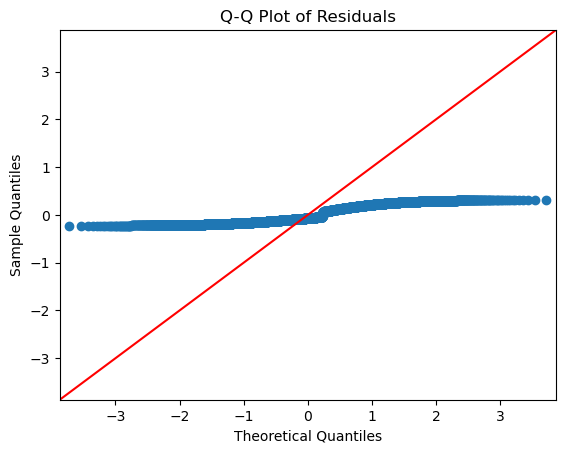

In [60]:
#define the predictor variables
y = df_reg_minmax.Additional_charges
X = df_reg_minmax[['Age', 'Stroke', 'Gender_Male', 'Initial_admin_Emergency Admission', 'Complication_risk_Low', 'Complication_risk_Medium']]

#add a constant to the independent variables
X = sm.add_constant(X)

#fit the regression model
model = sm.OLS(y, X).fit()

#get the residuals
residuals = model.resid

#plot the Q-Q plot for the residuals
sm.qqplot(residuals, line='45')
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [71]:
#define the dependent variable
y = df_reg_minmax.Additional_charges

#set multiple independent variables
X = df_reg_minmax[['Age', 'Stroke', 'Gender_Male', 'Initial_admin_Emergency Admission', 'Complication_risk_Low', 'Complication_risk_Medium']]

#fit the model
model = sm.OLS(y, sm.add_constant(X)).fit()

#get predicted values
y_pred = model.predict(sm.add_constant(X))

#calculate RSS
rss = np.sum((y - y_pred) ** 2)

#number of observations and predictors
n = len(y)
p = X.shape[1] + 1  #number of predictors + intercept

#calculate residual standard error 
rse = np.sqrt(rss / (n - p))
print("Residual Standard Error: ", rse)

Residual Standard Error:  0.16554724595158793
